# Import packages

In [65]:
import warnings
warnings.filterwarnings('ignore')

# For general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
sns.despine()
sns.set_context('talk', font_scale=1)

'''Will add more packages as necessary, just kept it minimal / clean for now'''

'Will add more packages as necessary, just kept it minimal / clean for now'

# Import dataset

In [50]:
train = pd.read_csv('train.csv', index_col='Id')
test = pd.read_csv('test.csv', index_col='Id')
train.head()

,price,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
Id,,,,,,,,,,,,,,,,,,,,,
0,150,f,22.0,t,-33.846469,151.205171,Apartment,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,strict,0.53
1,66,f,1.0,t,-33.895736,151.173529,Apartment,Private room,2,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,NaN
2,325,t,1.0,t,-33.879322,151.222408,House,Entire home/apt,4,2.0,...,10.0,10.0,10.0,10.0,10.0,9.0,f,f,moderate,2.38
3,145,f,1.0,f,-33.856874,151.149600,House,Entire home/apt,6,1.5,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,flexible,1.96
4,200,f,6.0,t,-33.907150,151.178552,House,Entire home/apt,4,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,f,f,moderate,2.73


# Data Processing
### Analysis of missing data

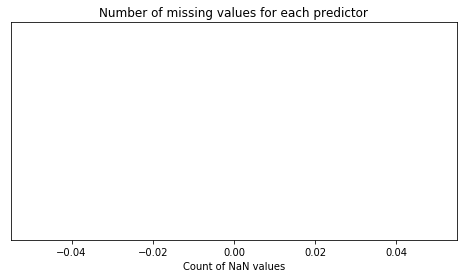

In [63]:
# Identifying missing data 
missing_data = train.isnull().sum(axis=0).reset_index()
missing_data.columns = ['column_name', 'missing_count']
missing_data = missing_data.loc[missing_data['missing_count'] > 0]
missing_data = missing_data.sort_values(by='missing_count')
ind = np.arange(missing_data.shape[0])

fig, ax = plt.subplots(figsize=(8,4))
rects = ax.barh(ind, missing_data.missing_count.values)
ax.set_yticks(ind)
ax.set_yticklabels(missing_data.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of NaN values")
ax.set_title("Number of missing values for each predictor")

plt.show()

In [52]:
# Data with a missing ratio of greater than 50%
missing_data = train.isnull().sum(axis=0).reset_index()
missing_data.columns = ['Predictor', 'Count of NaN values']
missing_data['Missing Ratio'] = missing_data['Count of NaN values'] / train.shape[0]
missing_data.loc[missing_data['Missing Ratio'] > 0]

,Predictor,Count of NaN values,Missing Ratio
1,host_is_superhost,2,0.002
2,host_total_listings_count,2,0.002
3,host_identity_verified,2,0.002
9,bathrooms,3,0.003
11,beds,2,0.002
12,security_deposit,426,0.426
13,cleaning_fee,307,0.307
18,review_scores_rating,340,0.340
19,review_scores_accuracy,342,0.342
20,review_scores_cleanliness,342,0.342


### Filling missing data for Exploratory Data Analysis

In [53]:
# Basic function to impute missing data with None or the mean
for i in missing_data['Predictor']:
    if train[i].dtypes == 'object':
        train[i].fillna(value='None', inplace=True)
    elif train[i].dtypes == 'float64' or 'int64':
        train[i].fillna(value=np.mean(train[i]), inplace=True)

### Separating predictors into their datatypes for later

In [59]:
response = ['price']
predictors = [x for x in list(train.columns) if x not in response]

# Can add accordingly
# categorical = []
# continuous = []
# discrete = []

# Exploratory Data Analysis

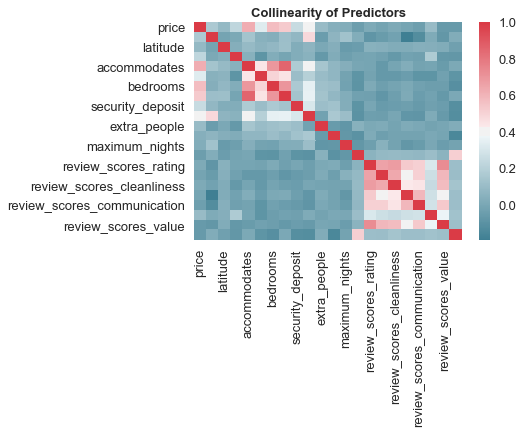

In [71]:
# Correlation matrix for all variables against each other
fig, ax = plt.subplots()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[response+predictors].corr(), ax=ax, cmap=cmap)
ax.set_title('Collinearity of Predictors', fontweight='bold', fontsize=13)

plt.show()
#fig.savefig('Collinearity of Predictors.png')

In [ ]:
# More to come...